In [1]:
"""
chapter 2 
"""

# import libs 

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
# from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap 

from Perceptron import Perceptron
from AdalineGD import AdalineGD
from AdalineSGD import AdalineSGD

In [2]:
# ------------ helper methods ---------------------------

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    visualize the decision boundaries for 2D datasets 
    """
    # setup marker generator and color map
    # define a number of colors and markers and create a color map from the list of colors via ListedColormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # plot the decision surface
    #  determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays xx1 and xx2 via the NumPy mesh-grid function.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # draw a contour plot via matplotlib's contourf function that maps the different decision regions to different colors for each predicted class in the grid array
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


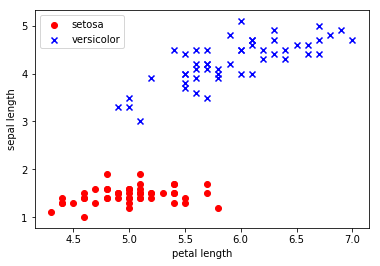

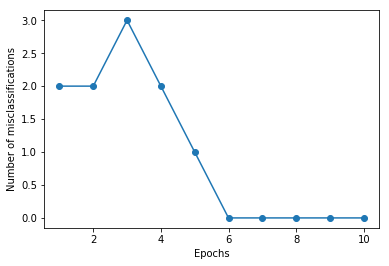

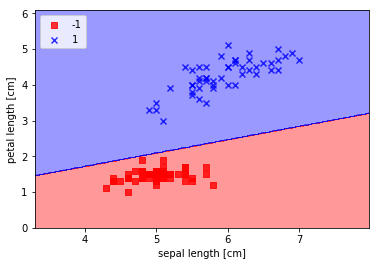

In [3]:

# test Perceptron class 
# P 54

# download dataset 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' 
df = pd.read_csv(url, header=None)
# print(df.tail())


# extract the first 100 class labels
y = df.iloc[0:100, 4].values
# convert the class labels into the two integer 
y = np.where(y == 'Iris-setosa', -1, 1)
# only consider the two features sepal length and petal length for visualization purposes
X = df.iloc[0:100, [0, 2]].values


# --------------------------------------------------

# visualization
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

# train perceptron 
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,  marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

# visualize the decision boundaries
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

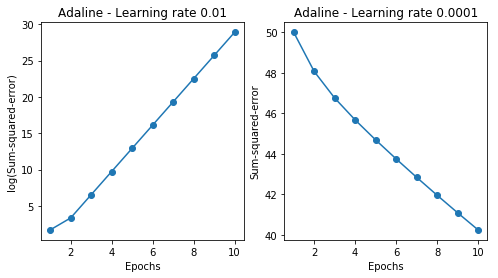

In [4]:
# test AdalineGD class 
# P 64 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


# learning rate too large: error becomes larger  

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')


# learning rate too small: very large number of epochs to converge  

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

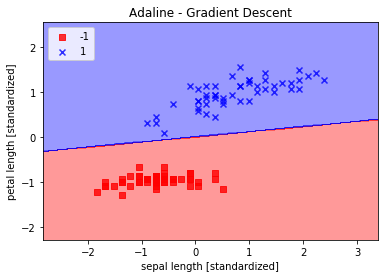

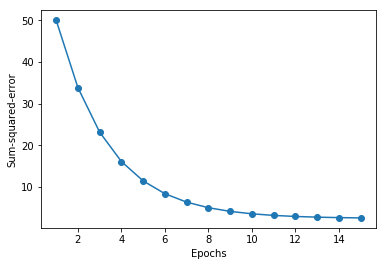

In [5]:
# ----------------------------------------------------

# standardization 
# P 66 
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()  # column 0 
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()  # column 1 

# Adaline now converges after training on the standardized features using a learning rate η=0.01
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

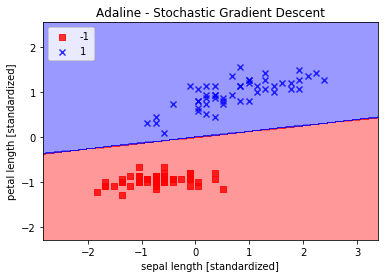

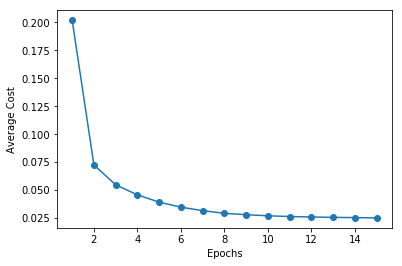

In [6]:
# ----------------------------------------------
# P 71
# test AdalineSGD method 

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()